# DL dia a dia
<a href="https://colab.research.google.com/github/beangoben/deep_learning_escuela_verano_19/blob/master/notebooks/2b_DL_dia_a_dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargamos-librerias" data-toc-modified-id="Cargamos-librerias-1">Cargamos librerias</a></span><ul class="toc-item"><li><span><a href="#metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad" data-toc-modified-id="metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad-1.1">metricas de evaluacion (sigmas) + funciones de utilidad</a></span></li><li><span><a href="#Datos-de-entrenamiento!" data-toc-modified-id="Datos-de-entrenamiento!-1.2">Datos de entrenamiento!</a></span></li><li><span><a href="#preprocesamiento-para-X-y-Y" data-toc-modified-id="preprocesamiento-para-X-y-Y-1.3">preprocesamiento para X y Y</a></span></li></ul></li><li><span><a href="#Tensorflow" data-toc-modified-id="Tensorflow-2">Tensorflow</a></span></li><li><span><a href="#Keras" data-toc-modified-id="Keras-3">Keras</a></span><ul class="toc-item"><li><span><a href="#Red-sencillita" data-toc-modified-id="Red-sencillita-3.1">Red sencillita</a></span></li><li><span><a href="#Calidad-de-vida:-liveloss!" data-toc-modified-id="Calidad-de-vida:-liveloss!-3.2">Calidad de vida: liveloss!</a></span></li><li><span><a href="#Calidad-de-vida:-agregando-un-tensorboard-y-un-learn-rate-scheduler" data-toc-modified-id="Calidad-de-vida:-agregando-un-tensorboard-y-un-learn-rate-scheduler-3.3">Calidad de vida: agregando un tensorboard y un learn rate scheduler</a></span></li><li><span><a href="#Trucos:-Regularizadores-de-redes" data-toc-modified-id="Trucos:-Regularizadores-de-redes-3.4">Trucos: Regularizadores de redes</a></span></li><li><span><a href="#Actividad:-Crea-una-red-profunda" data-toc-modified-id="Actividad:-Crea-una-red-profunda-3.5">Actividad: Crea una red profunda</a></span></li><li><span><a href="#trucos:-Dropout" data-toc-modified-id="trucos:-Dropout-3.6">trucos: Dropout</a></span></li><li><span><a href="#Trucos:-BatchNormalization-y-Activacion!" data-toc-modified-id="Trucos:-BatchNormalization-y-Activacion!-3.7">Trucos: BatchNormalization y Activacion!</a></span></li><li><span><a href="#Keras-Functional" data-toc-modified-id="Keras-Functional-3.8">Keras Functional</a></span></li><li><span><a href="#Truco:-Skip-connections" data-toc-modified-id="Truco:-Skip-connections-3.9">Truco: Skip connections</a></span></li><li><span><a href="#Optimizador" data-toc-modified-id="Optimizador-3.10">Optimizador</a></span></li><li><span><a href="#Controlando-el-learning-rate" data-toc-modified-id="Controlando-el-learning-rate-3.11">Controlando el learning rate</a></span></li><li><span><a href="#Actividad:-Crea-una-red-poderosa!" data-toc-modified-id="Actividad:-Crea-una-red-poderosa!-3.12">Actividad: Crea una red poderosa!</a></span></li></ul></li><li><span><a href="#Pytorch" data-toc-modified-id="Pytorch-4">Pytorch</a></span></li></ul></div>

![](extra/atlas.png)
# Cargamos librerias

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import sys

## metricas de evaluacion (sigmas) + funciones de utilidad


In [22]:
import higg_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc(clf,Y_test,Y_test_prob):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(clf.__class__.__name__))
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
    plt.legend(loc='lower right')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.tight_layout()
    return

def keras_graph(model):
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import Sequential

## Datos de entrenamiento!

Quieres saber mas? Visita

In [4]:
df=pd.read_csv('../data/HiggsBoson.csv')
print(df.columns)
target_col = 'Label'
df[target_col] = df[target_col].replace(to_replace=['s','b'],value=[1,0])
df = df.drop('EventId',axis=1)
print(df.shape)
df.head(1)

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,s


## preprocesamiento para X y Y

In [5]:
Y = df['Label'].replace(to_replace=['s','b'],value=[1,0]).values
weights = df['Weight'].values
X = df.drop(['EventId','Label','Weight'],axis=1).values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,w_train,w_test = train_test_split(X,Y,weights,train_size=0.3)
print(X_train.shape,Y_train.shape,w_train.shape)
print(X_test.shape,Y_test.shape,w_test.shape)

(75000, 30) (75000,) (75000,)
(175000, 30) (175000,) (175000,)


/home/beangoben/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Red sencillita

In [10]:
K.clear_session()

model = keras.Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
75000/75000 [==============================] - 2s 29us/step - loss: 0.5296 - acc: 0.7327
Epoch 2/5
75000/75000 [==============================] - 2s 28us/step - loss: 0.4958 - acc: 0.7628
Epoch 3/5
75000/75000 [==============================] - 2s 27us/step - loss: 0.4875 - acc: 0.7662
Epoch 4/5
75000/75000 [==============================] - 2s 27us/step - loss: 0.4825 - acc: 0.7689
Epoch 5/5
75000/75000 [==============================] - 2s 29us/step - loss: 0.4774 - acc: 0.7729


In [39]:
pcut=0.5
Y_train_pred = model.predict(X_train).flatten() > pcut
Y_test_pred = model.predict(X_test).flatten() > pcut
Y_train_prob= model.predict_proba(X_train).flatten()
Y_test_prob = model.predict_proba(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

--- Resultados --
- AUC train: 0.789 
- AUC test : 0.790 
- AMS train: 2.036 sigma
- AMS test : 2.734 sigma


(2.036349223971371, 2.7336171094233506)

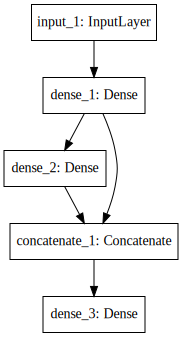

In [14]:
from IPython.display import SVG
from tensorflow.keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Trucos: Regularizadores de redes

**L2** pesos mas "equitativos"
**L1** pesos mas "sparse", muchos 0's.

In [41]:
from tensorflow.keras import regularizers

K.clear_session()

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[-1],
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01),
                activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
75000/75000 [==============================] - 3s 41us/step - loss: 14.9795 - acc: 0.6614
Epoch 2/5
75000/75000 [==============================] - 3s 37us/step - loss: 0.7593 - acc: 0.6587
Epoch 3/5
75000/75000 [==============================] - 3s 35us/step - loss: 0.7260 - acc: 0.6586
Epoch 4/5
75000/75000 [==============================] - 3s 36us/step - loss: 0.6907 - acc: 0.6586
Epoch 5/5
75000/75000 [==============================] - 3s 36us/step - loss: 0.6659 - acc: 0.6586


## Actividad: Crea una red profunda

Sugerencias:
* Agrega mas capas
* Hay alguna relacion entre las dimensiones de las capas?
* Como calculas el numero de parametros a entrenar?
* Cual es el efecto del learning rate?

## trucos: Dropout

Matar conexiones de manera aleatoria puede mejorar las conexiones.

Mas info en https://keras.io/layers/core/

In [37]:
from tensorflow.keras.layers import Dense, Activation, Dropout

K.clear_session()

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # 20% de las conexiones se apagan
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
75000/75000 [==============================] - 2s 33us/step - loss: 0.5672 - acc: 0.6971
Epoch 2/50
75000/75000 [==============================] - 2s 26us/step - loss: 0.5383 - acc: 0.7062
Epoch 3/50
75000/75000 [==============================] - 2s 26us/step - loss: 0.5341 - acc: 0.7075
Epoch 4/50
64480/75000 [========================>.....] - ETA: 0s - loss: 0.5332 - acc: 0.7066

KeyboardInterrupt: 

## Trucos: funciones de Activacion!

Muy buena motivacion: https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/


![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/activations.png?raw=true)

In [38]:
from tensorflow.keras.layers import Dense, Activation, Dropout

K.clear_session()

model = Sequential()
model.add(Dense(units=100, input_dim=X_train.shape[-1], kernel_initializer='normal'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 3,601
Trainable params: 3,401
Non-trainable params: 200
_________________________________________________________________
None
Epoch 1/50
75000/75000 [==============================] - 4s 48us/step - loss: 0.5400 - acc: 0.7211
Epoch 2/50
75000/75000 [=========

## Batchnormalization

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout

K.clear_session()

model = Sequential()
model.add(Dense(units=100, input_dim=X_train.shape[-1], kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

## Keras Functional

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

K.clear_session()

inputs = Input(shape=(X_train.shape[-1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
pred = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=pred)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)
pcut=0.5
Y_train_pred = model(X_train).flatten() > pcut
Y_test_pred = model(X_test).flatten() > pcut
Y_train_prob= model(X_train).flatten()
Y_test_prob = model(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
75000/75000 [==============================] - 3s 45us/step - loss: 8.3269 - acc: 0.4069
Epoch 2/5
75000/75000 [==============================] - 3s 43us/step - loss: 8.1561 - acc: 0.4182
Epoch 3/5
75000/75000 [==============================] - 3s 37us/step

ValueError: Layer model_1 was called with an input that isn't a symbolic tensor. Received type: <class 'numpy.ndarray'>. Full input: [array([[ 1.31783e+02,  2.54800e+00,  6.00680e+01, ..., -9.99000e+02,
        -9.99000e+02,  1.22887e+02],
       [-9.99000e+02,  7.01190e+01,  8.32330e+01, ..., -9.99000e+02,
        -9.99000e+02,  0.00000e+00],
       [ 1.38071e+02,  5.86400e+01,  6.85920e+01, ..., -9.99000e+02,
        -9.99000e+02,  0.00000e+00],
       ...,
       [ 2.39320e+02,  2.83010e+01,  1.05537e+02, ..., -9.99000e+02,
        -9.99000e+02,  4.17280e+01],
       [ 1.37685e+02,  3.49000e-01,  8.98520e+01, ..., -9.99000e+02,
        -9.99000e+02,  3.22280e+01],
       [ 1.07309e+02,  5.13900e+01,  6.42100e+01, ..., -9.99000e+02,
        -9.99000e+02,  3.26810e+01]])]. All inputs to the layer should be tensors.

## Truco: Skip connections

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           1984        input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 128)          0           dense_1[0][0]                    
                                                                 dense_2[0][0]                    
__________

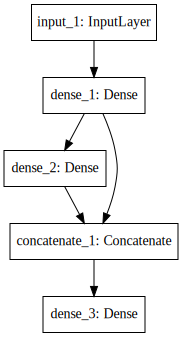

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

K.clear_session()

inputs = Input(shape=(X_train.shape[-1],))
x1 = Dense(64, activation='relu')(inputs)
x2 = Dense(64, activation='relu')(x1)
skipped = Concatenate()([x1,x2])
pred = Dense(1, activation='sigmoid')(skipped)

model = Model(inputs=inputs, outputs=pred)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)
pcut=0.5
Y_train_pred = model(X_train).flatten() > pcut
Y_test_pred = model(X_test).flatten() > pcut
Y_train_prob= model(X_train).flatten()
Y_test_prob = model(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)
keras_graph(model)


## Optimizador




![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/gradient_descent.gif?raw=true)


Imagenes de Sebastian Ruder (http://ruder.io)


![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/optimizers_contours.gif?raw=true)

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/optimizers_saddle.gif?raw=true)

Imagenes de https://github.com/wassname/viz_torch_optim'


Y hay muchos mas en camino! (http://www.fast.ai/2018/07/02/adam-weight-decay/)

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras import optimizers

lr = 0.01
K.clear_session()
for opt in [optimizers.SGD(lr=lr),
            optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True),
            optimizers.Adam(lr=lr),
            optimizers.Adagrad(lr=lr)
           ]:
    print('===={}==='.format(str(opt.__class__)))
    inputs = Input(shape=(X_train.shape[-1],))
    x1 = Dense(64, activation='relu')(inputs)
    x2 = Dense(64, activation='relu')(x1)
    skipped = Concatenate()([x1,x2])
    pred = Dense(1, activation='sigmoid')(skipped)
    model = Model(inputs=inputs, outputs=pred)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=5, batch_size=32)
    pcut=0.5
    Y_train_pred = model(X_train).flatten() > pcut
    Y_test_pred = model(X_test).flatten() > pcut
    Y_train_prob= model(X_train).flatten()
    Y_test_prob = model(X_test).flatten()
    eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

====<class 'keras.optimizers.SGD'>===
Epoch 1/5
75000/75000 [==============================] - 3s 44us/step - loss: 5.7608 - acc: 0.6422
Epoch 2/5
75000/75000 [==============================] - 3s 42us/step - loss: 5.5027 - acc: 0.6586
Epoch 3/5
75000/75000 [==============================] - 3s 39us/step - loss: 5.5027 - acc: 0.6586
Epoch 4/5
75000/75000 [==============================] - 3s 44us/step - loss: 5.5027 - acc: 0.6586
Epoch 5/5
75000/75000 [==============================] - 3s 38us/step - loss: 5.5027 - acc: 0.6586
--- Resultados --
- AUC train: 0.500 
- AUC test : 0.500 
- AMS train: 0.000 sigma
- AMS test : 0.000 sigma
====<class 'keras.optimizers.SGD'>===
Epoch 1/5
75000/75000 [==============================] - 4s 48us/step - loss: 5.5046 - acc: 0.6585
Epoch 2/5
75000/75000 [==============================] - 4s 48us/step - loss: 5.5027 - acc: 0.6586: 0s - loss: 5.5110 - acc:
Epoch 3/5
75000/75000 [==============================] - 3s 46us/step - loss: 5.5027 - acc: 0.658

## Controlando el learning rate


#### One cycle LR
![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/lr_finder.png?raw=true))
#### Cycles for LR
![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/cyclic_lr.png?raw=true))
![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/Lanscape_lr.png?raw=true)



* Cyclical Learning Rates for Training Neural Networks (https://arxiv.org/abs/1506.01186)
* Setting the learning rate of your neural network. (https://www.jeremyjordan.me/nn-learning-rate/)
* SNAPSHOT ENSEMBLES: TRAIN 1, GET M FOR FREE (https://arxiv.org/pdf/1704.00109.pdf)
* SGDR: STOCHASTIC GRADIENT DESCENT WITH WARM RESTARTS (https://arxiv.org/pdf/1608.03983.pdf)

Epoch 1/5
75000/75000 [==============================] - 3s 38us/step - loss: 0.6433 - acc: 0.6586
Epoch 2/5
75000/75000 [==============================] - 3s 40us/step - loss: 0.6425 - acc: 0.6586
Epoch 3/5
75000/75000 [==============================] - 3s 36us/step - loss: 0.6422 - acc: 0.6586
Epoch 4/5
75000/75000 [==============================] - 3s 39us/step - loss: 0.6421 - acc: 0.6586
Epoch 5/5
75000/75000 [==============================] - 3s 39us/step - loss: 0.6420 - acc: 0.6586


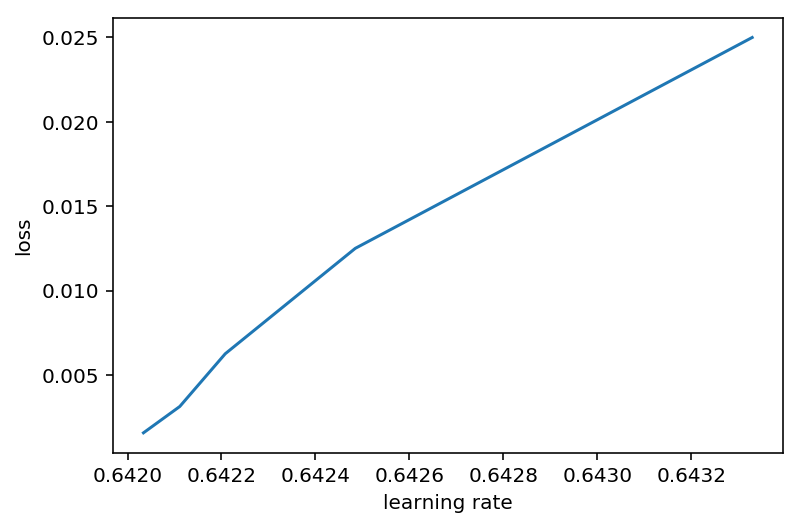

In [48]:
from keras.callbacks import LearningRateScheduler
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 1.0
    lrate = initial_lrate * np.power(drop,  
           np.floor((1+epoch)/epochs_drop))
    return lrate

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks = [loss_history, lrate]


hist = model.fit(X_train, Y_train,
          epochs=5, batch_size=32,callbacks=callbacks)

plt.plot(loss_history.losses,loss_history.lr)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

## Actividad: Crea una red poderosa!

Sugerencias:
* Usa los trucos que vimos
* Cual es el efecto de entrenar con un learning rate bajo, alto?
* Ojo con le optimizador y el learning rate, es super importante!

## Como optimizar hiperparametros

![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/bayesopt.gif?raw=true)


* https://github.com/fmfn/BayesianOptimization/blob/master/examples/visualization.ipynb
* https://github.com/SheffieldML/GPyOpt
* https://github.com/automl/pysmac
* http://sheffieldml.github.io/GPyOpt/

In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
from matplotlib import gridspec

def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

## Black box function

In [ ]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)


x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y)
plt.show()

## Inicia el optimizador bayesiano (BO)

In [ ]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)})
optimizer.maximize(init_points=0, n_iter=0, kappa=5)

## Itera el BO

In [ ]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

## Actividad: Optimiza un parametro de tu red

# Cuantificando incertidumbre
## via ensembles

### Siempre transforma tu incertidumbre en algo interpretable

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html
https://scikit-learn.org/stable/modules/calibration.html

## Ultima capa bayesiana

In [ ]:
import tensorflow_probability as tfp
